In [1]:
import pandas as pd
import polars as pl
import numpy as np

/Users/silashayes/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [25]:
cols = ['FUNDING_OFFICE_NAME', 'ADDRESS_STATE', 'CORP_ENTITY_NOT_TAX_EXEMPT',
        'CORP_ENTITY_TAX_EXEMPT', 'PARTNERSHIP_OR_LLP', 'SOLE_PROPREITORSHIP',
        'MANUFACTURER_OF_GOODS', 'RESEARCH_AND_DEVELOPMENT', 'SERVICE_PROVIDER',
        'SUBCHAPTER_S_CORPORATION', 'LIMITED_LIABILITY_CORPORATION', 'FOR_PROFIT_ORGANIZATION', 
        'CO_BUS_SIZE_DETERMINATION', 'VENDOR_ADDRESS_COUNTRY_NAME']

In [26]:
%%time
test_2022 = pl.read_parquet('2022.parquet', columns=cols)

CPU times: user 3.16 s, sys: 8.06 s, total: 11.2 s
Wall time: 5.35 s


In [27]:
test_sampleR2 = test_2022.filter(test_2022['CO_BUS_SIZE_DETERMINATION']=='SMALL BUSINESS')
test_sampleR2 = test_sampleR2.filter(test_sampleR2['VENDOR_ADDRESS_COUNTRY_NAME']=='UNITED STATES').sample(100000)

In [28]:
test_sampleR2.write_csv('../test_sampleR2.csv')

array([[<Axes: title={'center': 'counts'}>]], dtype=object)

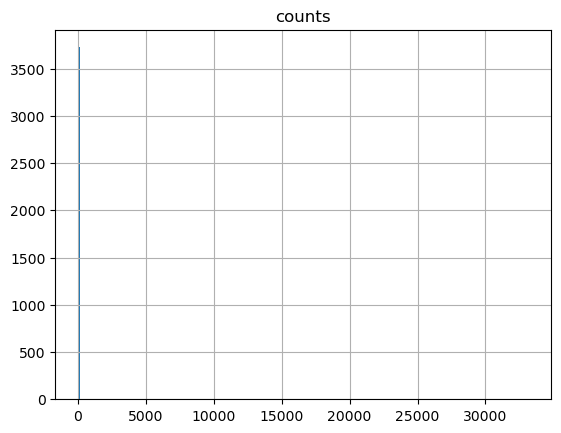

In [46]:
test_sampleR2['FUNDING_OFFICE_NAME'].value_counts().sort('counts').to_pandas().hist(bins=200)